In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

## X measuring circuit

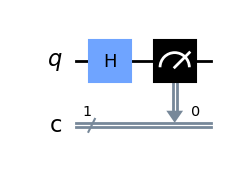

In [2]:
meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_x.draw()

## Z measuring circuit

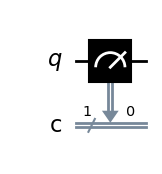

In [3]:
meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_z.draw()

## Carrying out Z measurement of 0 state qubit

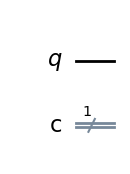

In [5]:
qc = QuantumCircuit(1,1)

qc.draw()

In [7]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')
z_meas_counts = backend.run(qc.compose(meas_z)).result().get_counts()
print('Results from z measurement:', z_meas_counts)

Results from z measurement: {'0': 1024}


## Carrying out X measurement of 0 state qubit

In [8]:
x_meas_counts = backend.run(qc.compose(meas_x)).result().get_counts()
print('Results from x measurement:', x_meas_counts)

Results from x measurement: {'1': 476, '0': 548}


## Carrying out measurements of 1 state qubit

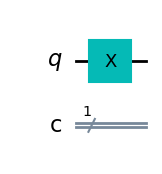

In [9]:
qc = QuantumCircuit(1,1)
qc.x(0)

qc.draw()


In [10]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 1024}
Results from x measurement: {'1': 536, '0': 488}


## Carrying out measurements of |+> state qubit

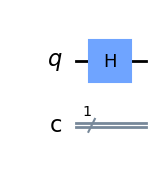

In [11]:
qc = QuantumCircuit(1,1)
qc.h(0)

qc.draw()

In [12]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 501, '0': 523}
Results from x measurement: {'0': 1024}


## For the angle -pi/4, we see both results are partly random, but not completely.

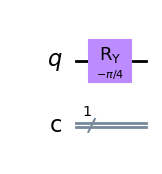

In [13]:
from math import pi

qc = QuantumCircuit(1, 1)
qc.ry(-pi/4, 0)

qc.draw()

In [14]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 140, '0': 884}
Results from x measurement: {'0': 164, '1': 860}


## Charlie, Alice and Bob experiment (quantum)

### Charlie makes the below entangled state

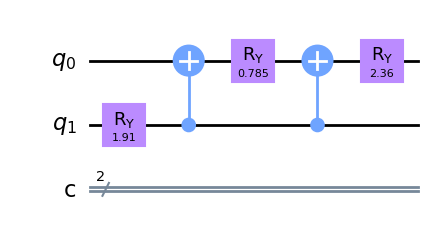

In [15]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)

qc_charlie.draw()

### Both Alice and Bob make Z measurements

Results for z measurements:


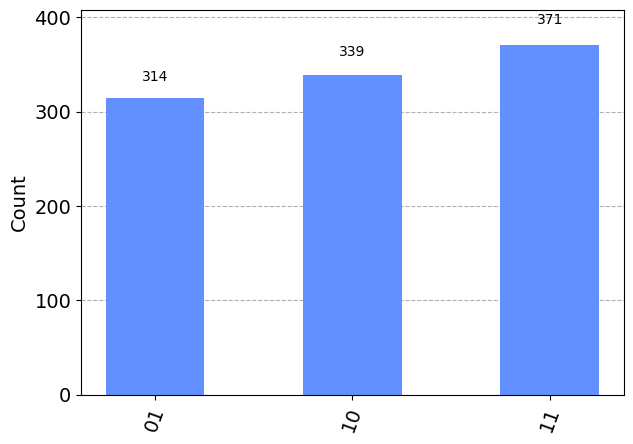

In [16]:
meas_zz = QuantumCircuit(2,2)
meas_zz.measure([0,1],[0,1])
from qiskit.visualization import plot_histogram

print('Results for z measurements:')
counts = backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
plot_histogram(counts)

### Bob uses X and Alice uses Z

Results for a z and an x measurement:


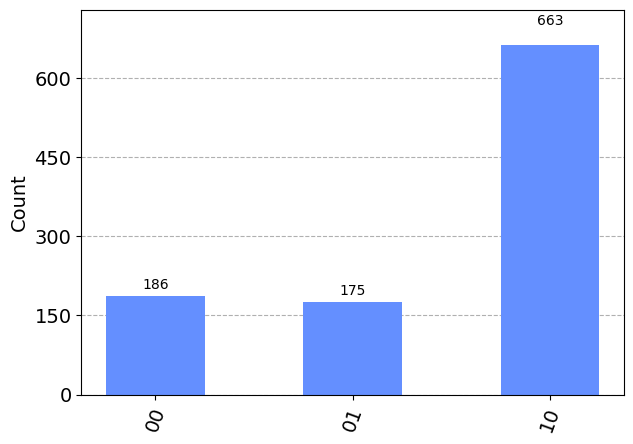

In [18]:
meas_zx = QuantumCircuit(2,2)
meas_zx.h(0)
meas_zx.measure([0,1],[0,1])

print('Results for a z and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_zx)).result().get_counts()
plot_histogram(counts)

### Bob uses Z and Alice uses X

Results for an x and a z measurement:


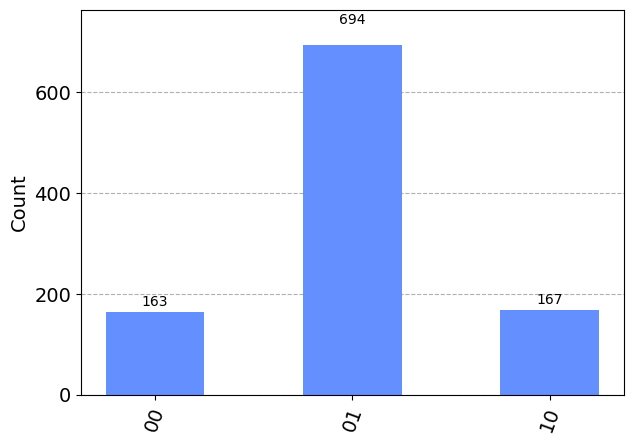

In [19]:
meas_xz = QuantumCircuit(2,2)
meas_xz.h(1)
meas_xz.measure([0,1],[0,1])

print('Results for an x and a z measurement:')
counts = backend.run(qc_charlie.compose(meas_xz)).result().get_counts()
plot_histogram(counts)

### Both use X

Results for an x and an x measurement:


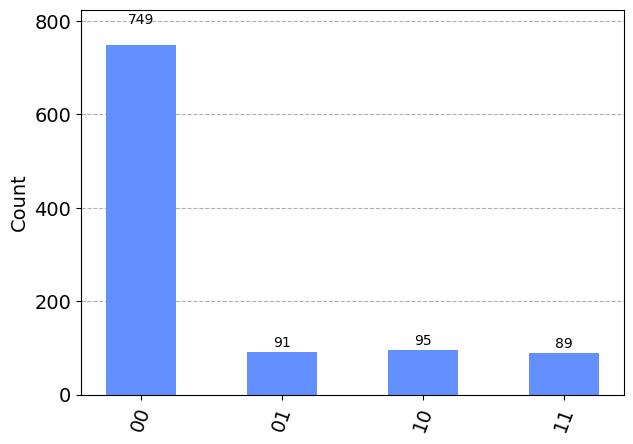

In [20]:
meas_xx = QuantumCircuit(2,2)
meas_xx.h([0,1])
meas_xx.measure([0,1],[0,1])

print('Results for an x and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)

## This contradicts conclusion drawn from inferences made from the other 3 experiments. This is in contrast to the analogous classical experiment with objects of various shapes and colors. This proves that quantum correlations between qubits in entangled states are unique and distinct (more random) than classical correlations.